# Auto ARIMA

## #01. 작업준비

### [1] 패키지 가져오기

`pmdarima` 패키지의 설치가 필요하다

In [1]:
from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
import warnings
warnings.filterwarnings(action='ignore')

from pmdarima.arima import auto_arima
from matplotlib import pyplot as plt
from matplotlib import dates
import seaborn as sb

### [2] 데이터 가져오기

#### DateTimeIndex 형태로 설정

In [3]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/air_passengers.xlsx',index_col='Month', timeindex=True, info=False)

#### DateTimeIndex 확인

In [4]:
origin.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리

시계열 데이터 특성상 데이터가 순서대로 배치되어야 하므로 슬라이싱을 사용해야 한다.

In [5]:
# 처음부터 70% 위치 전까지 분할
train = origin[:int(0.7*len(origin))]
my_pretty_table(train.head())

# 70% 위치부터 끝까지 분할
test = origin[int(0.7*len(origin)):]
my_pretty_table(test.head())


+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-01-01 00:00:00 |          112 |
| 1949-02-01 00:00:00 |          118 |
| 1949-03-01 00:00:00 |          132 |
| 1949-04-01 00:00:00 |          129 |
| 1949-05-01 00:00:00 |          121 |
+---------------------+--------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1957-05-01 00:00:00 |          355 |
| 1957-06-01 00:00:00 |          422 |
| 1957-07-01 00:00:00 |          465 |
| 1957-08-01 00:00:00 |          467 |
| 1957-09-01 00:00:00 |          404 |
+---------------------+--------------+


## #03. 분석 모형 구축

시계열 데이터를 ARIMA 모델에 맞추려고 할 때 첫 번째 목표는 측정항목을 최적화하는 $ARIMA(p,d,q)(P,D,Q,s)$ 값을 찾는 것

계절성을 의미하는 $s$값은 분석가가 판단하여 지정해야 한다.

$(p,d,q)(P,D,Q)$값은 분석가가 최소값과 최대값을 지정한다.

$s$ 값을 고정한 상태에서 `0`부터 $(p,d,q)(P,D,Q)$ 로 주어진 값의 범위 안에서 최적의 값을 검색한다.

> 오래걸린다...

In [6]:
my_p = 3
my_d = 2
my_q = 3
my_s = 12

model = auto_arima(
    y = train,
    star_p = 0,
    max_p = my_p, 
    d = my_d, 
    start_q = 0, 
    max_q = my_q, 
    seasonal= True,
    m = my_s,
    start_P = 0, 
    max_P = my_p, 
    D = my_d, 
    start_Q = 0,  
    max_Q = my_q,
    trace = True
)


Performing stepwise search to minimize aic
 ARIMA(2,2,0)(0,2,0)[12]             : AIC=655.008, Time=0.07 sec
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=700.560, Time=0.03 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=628.108, Time=0.17 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=656.611, Time=0.04 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=618.256, Time=0.36 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=614.066, Time=0.71 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=2.89 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,2,0)(3,2,0)[12]             : AIC=652.212, Time=0.58 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=606.557, Time=0.94 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=612.571, Time=0.42 sec
 ARIMA(2,2,0)(3,2,1)[12]             : AIC=inf, Time=2.84 sec
 ARIMA(2,2,0)(2,2,1)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(3,2,0)(3,2,0)[12]             : AIC=604.074, T

## #04. 예상치 생성

### [1] 검증데이터에 대한 예측치

훈련데이터 이후 `n_periods`개의 예측치를 생성한다.

In [7]:
pred = model.predict(n_periods=int(len(test))+ 12)
pred[:5]

1957-05-01    355.463949
1957-06-01    411.566881
1957-07-01    464.386219
1957-08-01    443.121620
1957-09-01    393.594241
Freq: MS, dtype: float64

### [2] 관측치와 예상치 비교

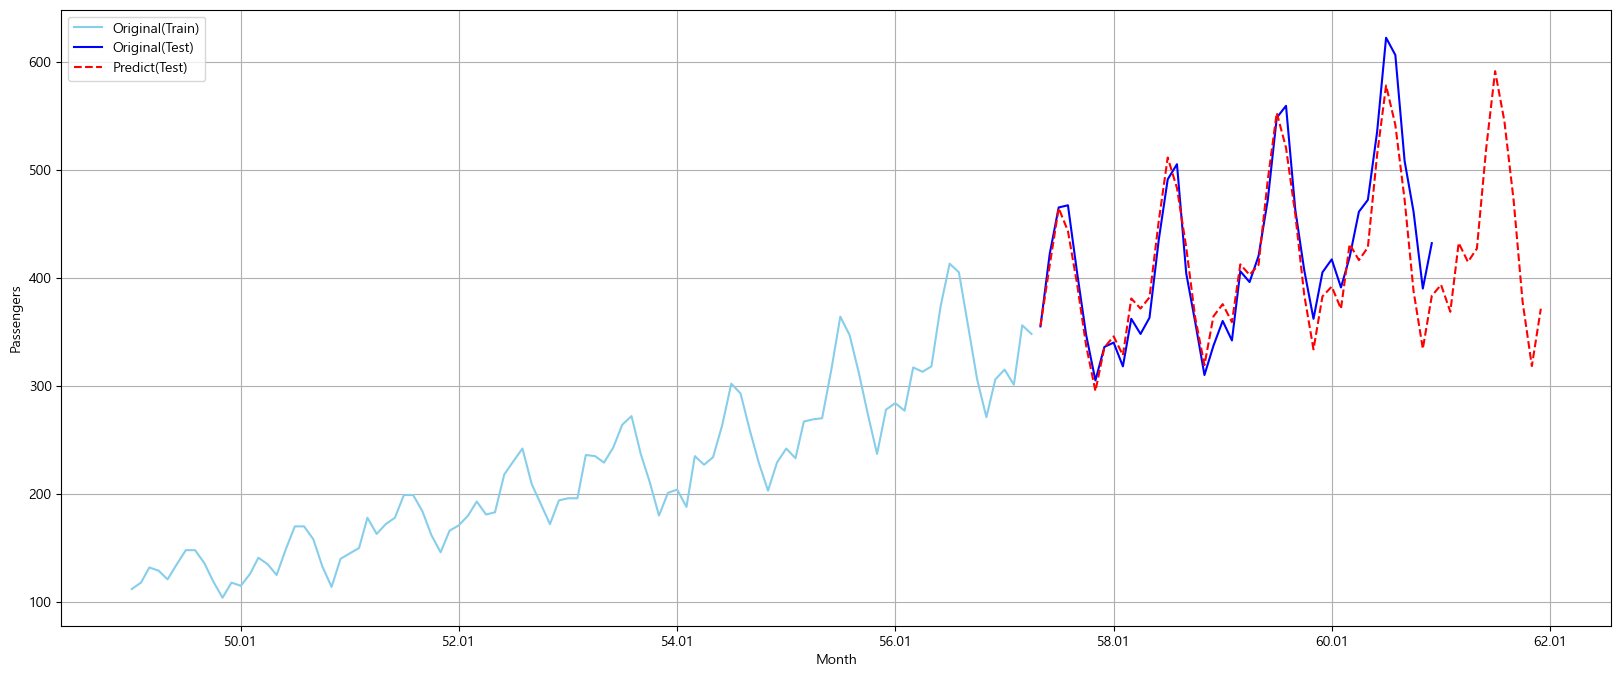

In [8]:
fig = plt.figure(figsize=(20,8), dpi=100)
ax = fig.gca()

sb.lineplot(data=train, x=train.index, y='Passengers', label='Original(Train)', color='skyblue', ax=ax)

sb.lineplot(data=test, x=test.index, y='Passengers', label='Original(Test)', color='blue', ax=ax)

sb.lineplot(x=pred.index, y=pred.values, label='Predict(Test)', linestyle='--', color='red', ax=ax)

ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')

monthyearFmt = dates.DateFormatter('%y.%m')
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()
plt.close()

## #05. 성능평가 - 잔차 플롯 검토

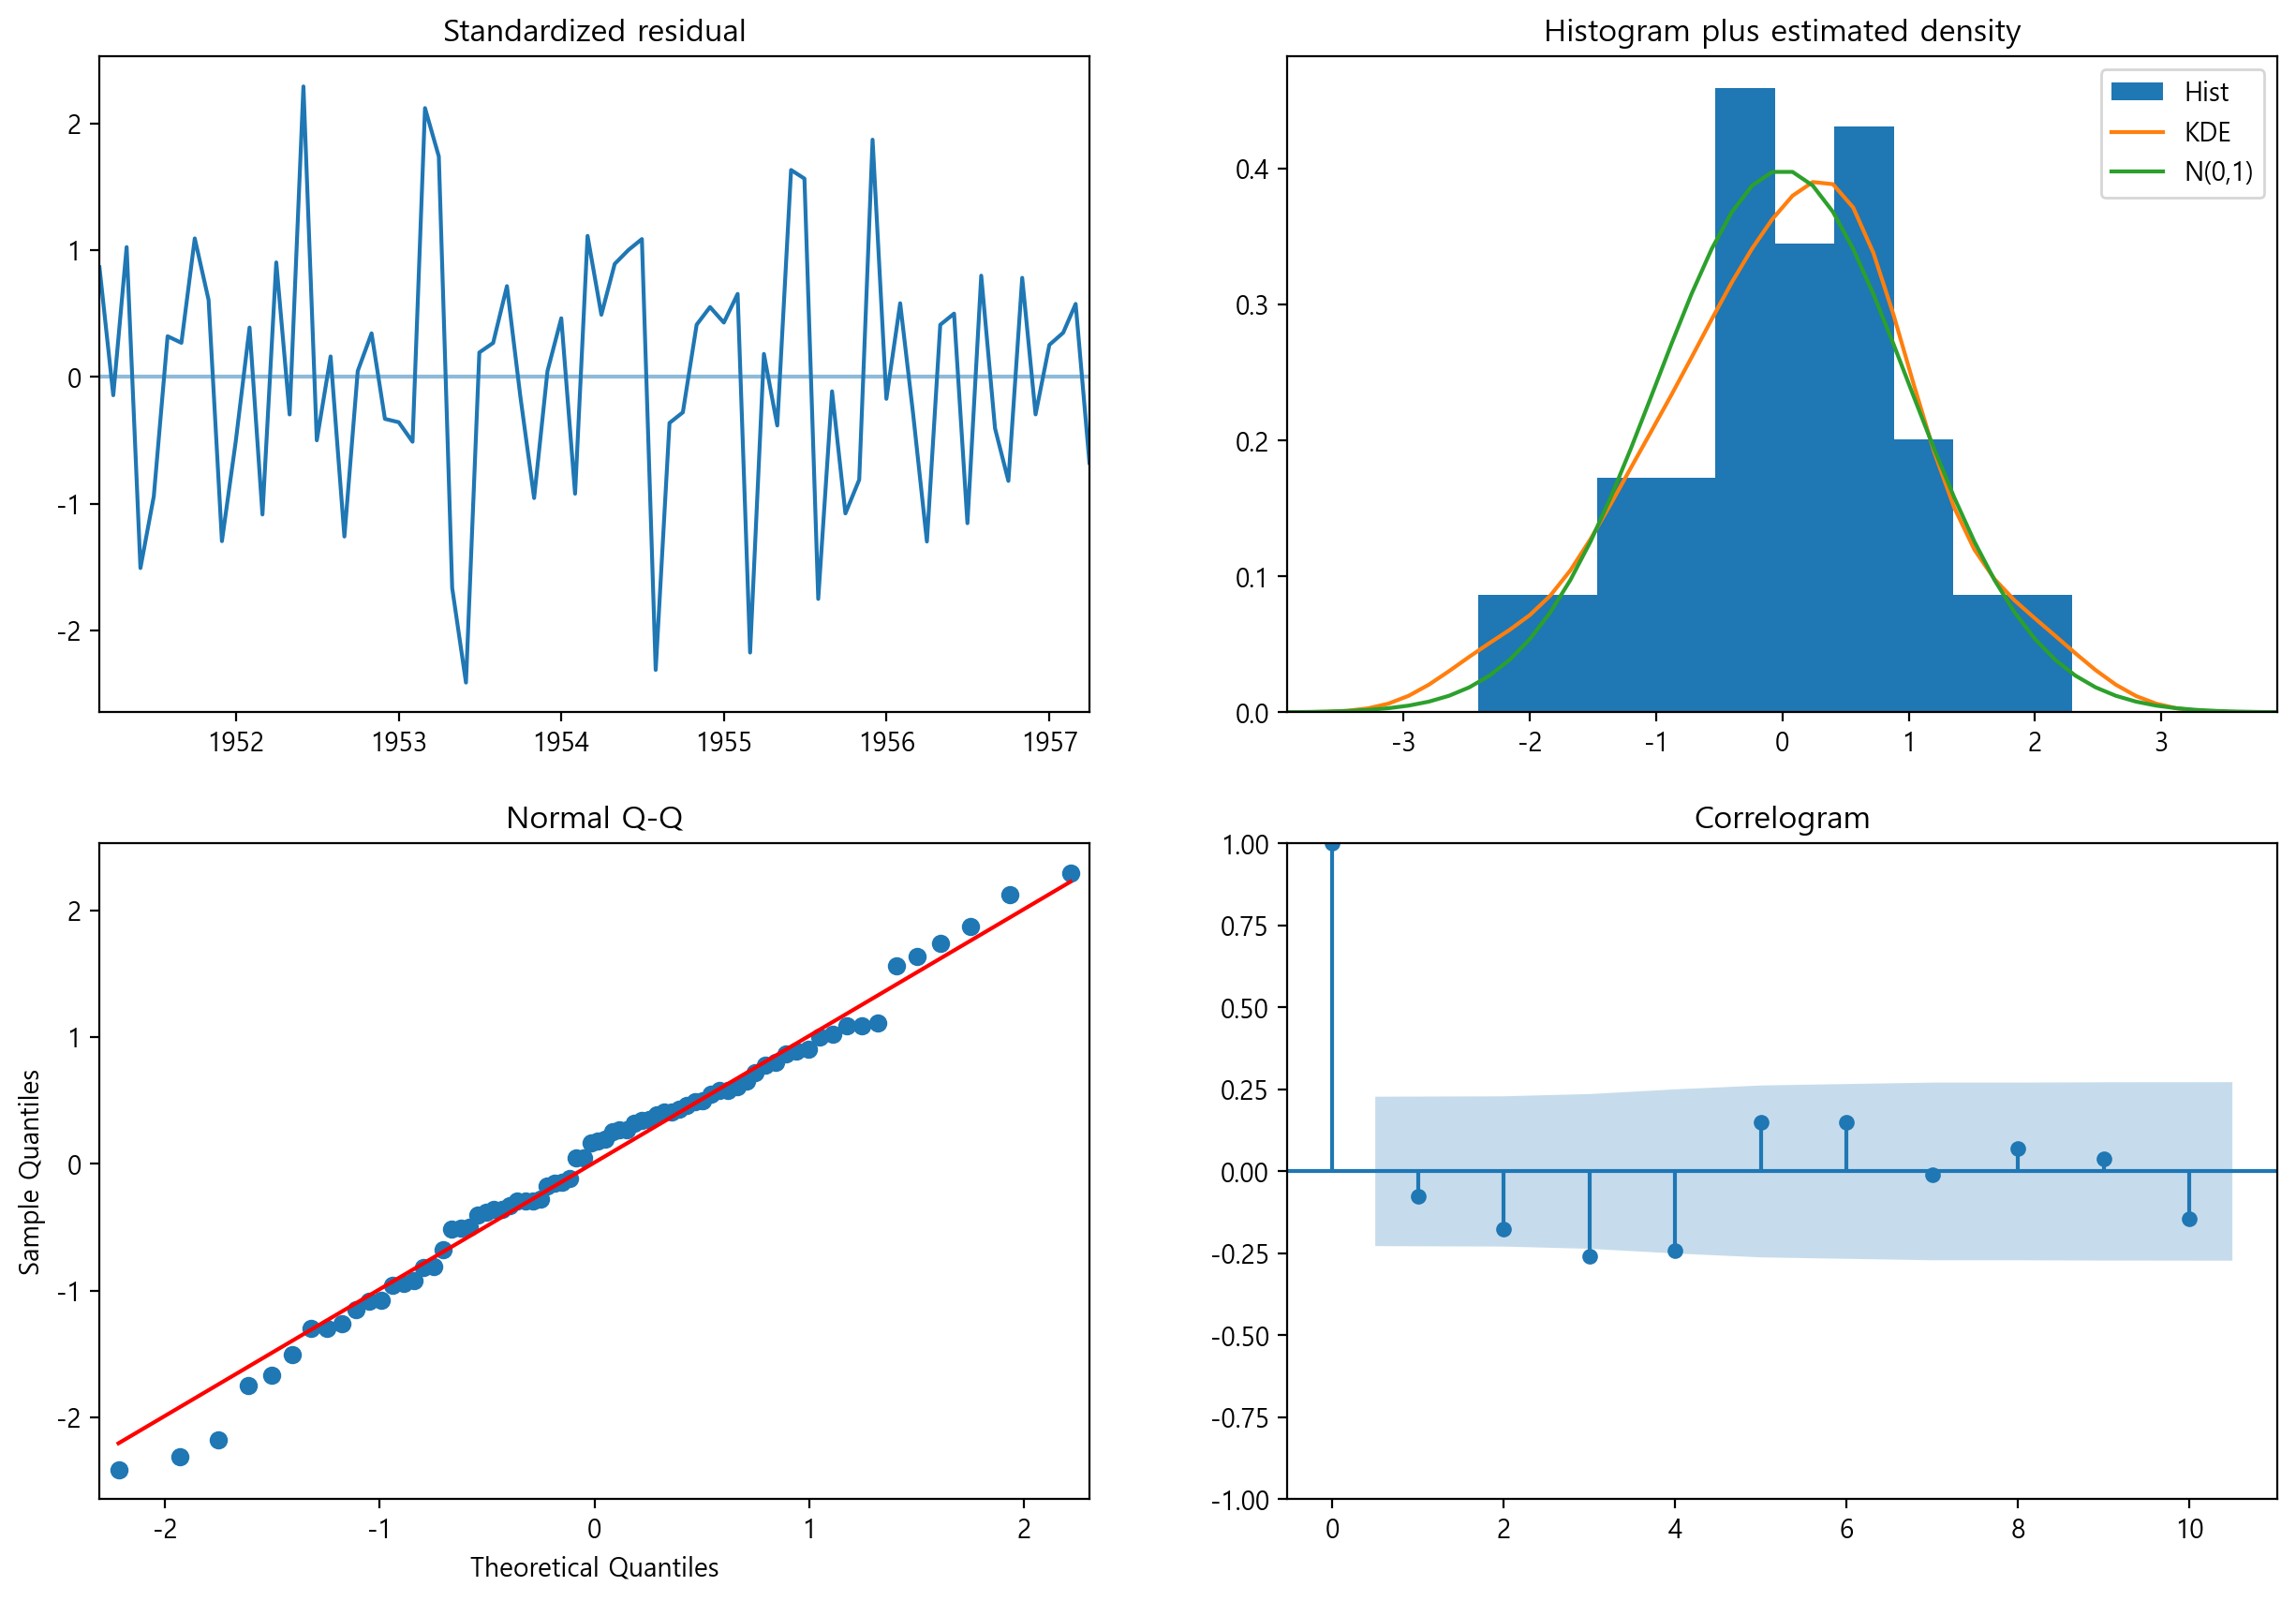

In [9]:
model.plot_diagnostics(figsize=(15, 10))
plt.show()
plt.close()